In [1]:
#Load libraries\n",
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Set working directory
os.chdir("E:\EDW\Projects\Bike Rental")
#os.getcwd()
#'E:\\EDW\\Projects\\Bike Rental'

In [4]:
#Load data
day_data = pd.read_csv("day.csv")
df=day_data
day_data_wo = day_data

In [7]:
#Missing Value Analysis

In [5]:
#1. Missing Value Identification
missing_val = pd.DataFrame(day_data.isnull().sum())
#missing_val
missing_val = missing_val.reset_index() #Reset index
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})#Rename variable
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(day_data))*100 #Calculate Missing Percentage
#missing_val

In [6]:
#Outlier Analysis


{'whiskers': [<matplotlib.lines.Line2D at 0x25e4436bcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x25e440d8a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e442c2f98>],
 'medians': [<matplotlib.lines.Line2D at 0x25e440d8e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e440ec470>],
 'means': []}

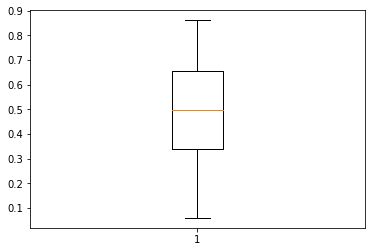

In [6]:
#Plot boxplot to visualize Outliers\n",
%matplotlib inline
plt.boxplot(day_data['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e44533e48>,
 'caps': [<matplotlib.lines.Line2D at 0x25e4453f518>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e44533a58>],
 'medians': [<matplotlib.lines.Line2D at 0x25e4453fba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e4453fef0>],
 'means': []}

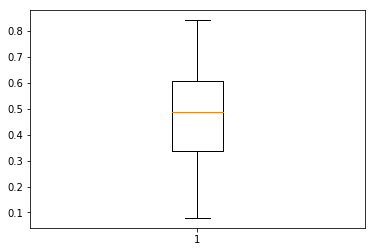

In [7]:
plt.boxplot(day_data['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x296fddb16d8>,
 'caps': [<matplotlib.lines.Line2D at 0x296fddb1d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x296fddb12e8>],
 'medians': [<matplotlib.lines.Line2D at 0x296fddbd438>],
 'fliers': [<matplotlib.lines.Line2D at 0x296fddbd780>],
 'means': []}

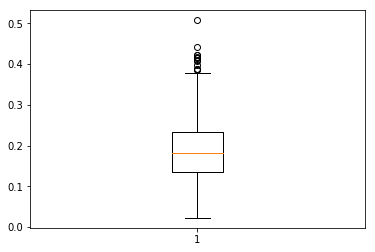

In [11]:
plt.boxplot(day_data['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e446a14a8>,
 'caps': [<matplotlib.lines.Line2D at 0x25e446a1b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e446a10b8>],
 'medians': [<matplotlib.lines.Line2D at 0x25e446a1f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e446ab550>],
 'means': []}

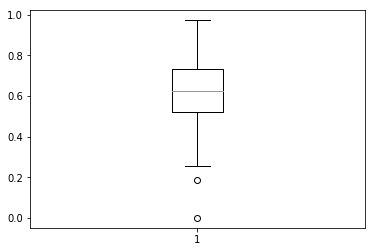

In [8]:
plt.boxplot(day_data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e447f5d68>,
 'caps': [<matplotlib.lines.Line2D at 0x25e447fe6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e447f5c18>],
 'medians': [<matplotlib.lines.Line2D at 0x25e447fed68>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e447fee48>],
 'means': []}

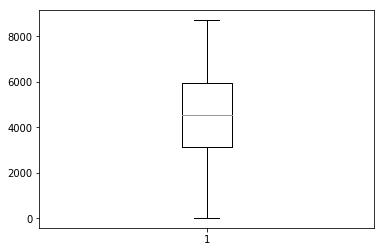

In [9]:
plt.boxplot(day_data['cnt'])

In [10]:
cnames = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
#Detect and delete outliers from data
for i in cnames:
     print(i)
     q75, q25 = np.percentile(day_data_wo.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)

     day_data_wo = day_data_wo.drop(day_data_wo[day_data_wo.loc[:,i] < min].index)
     day_data_wo = day_data_wo.drop(day_data_wo[day_data_wo.loc[:,i] > max].index)


temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
casual
-885.0
2323.0
registered
-840.0
8018.0
cnt
-788.125
9500.875


In [41]:
day_data_wo.shape

(676, 16)

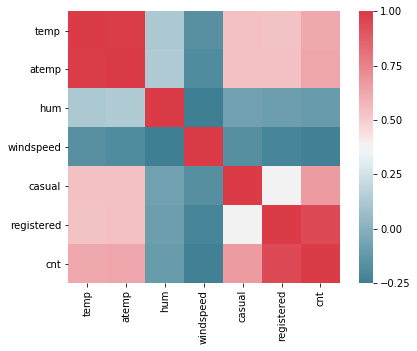

In [11]:
##Correlation analysis
#Correlation plot
df_corr = day_data.loc[:,cnames]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library\n",
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


In [12]:
#Chisquare test of independence
#Save categorical variables
from scipy.stats import chi2_contingency
cat_names = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(day_data['cnt'], day_data[i]))
    print(p)
    if p > 0.05:
        print("Variable not useful in predicting")

day_data = day_data.drop(["instant", "dteday","workingday","weathersit", "atemp", "casual", "registered"], axis=1)

season
0.5440596338517547
Variable not useful in predicting
yr
0.367724209978971
Variable not useful in predicting
mnth
0.49177634472851
Variable not useful in predicting
holiday
0.6781463865579803
Variable not useful in predicting
weekday
0.4102128310764939
Variable not useful in predicting
workingday
0.45435914436398794
Variable not useful in predicting
weathersit
0.6407439686474243
Variable not useful in predicting


In [12]:
day_data.shape

(731, 9)

In [13]:
##Machine Learning Algorithms
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


#Divide data into train and test
train, test = train_test_split(day_data, test_size=0.1)


In [14]:

#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:8], train.iloc[:,8])

#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:8])


In [15]:

#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

mape_dt = MAPE(test.iloc[:,8], predictions_DT)
print("error percentage for data  - Decision tree", mape_dt)

error percentage for data  - Decision tree 34.99140362129246


In [18]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor

#Random Forest for regression
fit_RF = RandomForestRegressor(bootstrap=True, max_depth=None, random_state=0 ,n_estimators=50).fit(train.iloc[:,0:8], train.iloc[:,8])

#Apply model on test data
predictions_RF = fit_RF.predict(test.iloc[:,0:8])

mape_rf = MAPE(test.iloc[:,8], predictions_RF)
print("error percentage for data  - Random Forest", mape_rf)

error percentage for data  - Random Forest 20.754610605266027


In [17]:
##Linear Regression

#Import libraries for LR
import statsmodels.api as sm

# Train the model using the training sets
linear_model = sm.OLS(train.iloc[:,8], train.iloc[:,0:8]).fit()

# Print out the statistics
linear_model.summary()

# make the predictions by the model
predictions_LR = linear_model.predict(test.iloc[:,0:8]) 


#Calculate MAPE
mape_lr = MAPE(test.iloc[:,8], predictions_LR)
print("error percentage for data - Linear Regression ", mape_lr)

error percentage for data - Linear Regression  26.4934812469788


In [20]:
#for outliers removed data
#Divide data into train and test
day_data_wo = df
day_data_wo = day_data_wo.drop(["instant", "dteday","workingday","weathersit", "atemp", "casual", "registered"], axis=1)
train_wo, test_wo = train_test_split(day_data_wo, test_size=0.1)
#Decision tree for regression
fit_DT_wo = DecisionTreeRegressor(max_depth=2).fit(train_wo.iloc[:,0:8], train_wo.iloc[:,8])

#Apply model on test data
predictions_DT_wo = fit_DT_wo.predict(test_wo.iloc[:,0:8])

mape_dt_wo = MAPE(test_wo.iloc[:,8], predictions_DT_wo)
print("error percentage for data without outlier - Decision tree", mape_dt_wo)

#Random Forest for regression
fit_RF_wo = RandomForestRegressor(bootstrap=True, max_depth=None, random_state=0 ,n_estimators=50).fit(train_wo.iloc[:,0:8], train_wo.iloc[:,8])
#Apply model on test data
predictions_RF_wo = fit_RF_wo.predict(test_wo.iloc[:,0:8])

mape_rf_wo = MAPE(test.iloc[:,8], predictions_RF_wo)
print("error percentage for data without outlier - Random Forest", mape_rf_wo)


# Train the model using the training sets
linear_model_wo = sm.OLS(train_wo.iloc[:,8], train_wo.iloc[:,0:8]).fit()

# make the predictions by the model
predictions_LR_wo = linear_model_wo.predict(test_wo.iloc[:,0:8]) 


#Calculate MAPE
mape_lr_wo = MAPE(test.iloc[:,8], predictions_LR)
print("error percentage for data without outliers - Linear Regression ", mape_lr_wo)

error percentage for data without outlier - Decision tree 27.90743114927884
error percentage for data without outlier - Random Forest 122.50341347000739
error percentage for data without outliers - Linear Regression  26.4934812469788
